In [1]:
mask_path = '/home/miguel/GI/1.5 - Synthetic Data Generation/diffuse-gen/diffuse-gen/guided_diffusion/segmented-images-roberta/FD-032/masks/FD-029-slice-36-image.png'

In [10]:
import blobfile as bf
import numpy as np
from PIL import Image

In [5]:
with bf.BlobFile(mask_path, "rb") as f:
    pil_mask = Image.open(f)
    pil_mask.load()

In [7]:
pil_mask = pil_mask.convert("L")

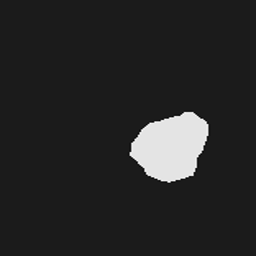

In [8]:
pil_mask

In [ ]:
def center_crop_arr(pil_image, image_size):
    # We are not on a new enough PIL to support the `reducing_gap`
    # argument, which uses BOX downsampling at powers of two first.
    # Thus, we do it by hand to improve downsample quality.
    while min(*pil_image.size) >= 2 * image_size:
        pil_image = pil_image.resize(
            tuple(x // 2 for x in pil_image.size), resample=Image.BOX
        )

    scale = image_size / min(*pil_image.size)
    pil_image = pil_image.resize(
        tuple(round(x * scale) for x in pil_image.size), resample=Image.BICUBIC
    )

    arr = np.array(pil_image)
    crop_y = (arr.shape[0] - image_size) // 2
    crop_x = (arr.shape[1] - image_size) // 2
    return arr[crop_y : crop_y + image_size, crop_x : crop_x + image_size]

In [20]:
mask_arr = center_crop_arr(pil_mask, 256)

In [25]:
mask_arr.max()

np.uint8(255)

In [26]:
mask_arr = np.where(mask_arr > 100, 1, -1)

In [27]:
import matplotlib.pyplot as plt

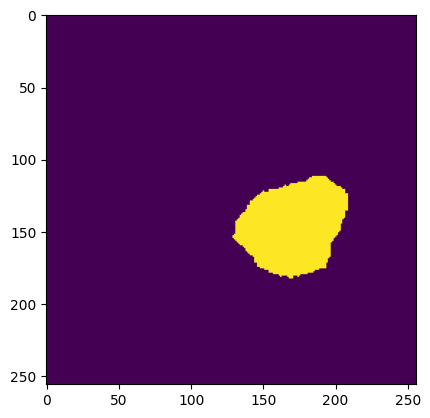

In [28]:
plt.imshow((mask_arr + 1))